In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time
from IPython import display 

def sal_normal(pos, revers=False):
    '''
    Simulates a single throw in the game of Snakes and Ladders.

    input:
    pos (int): current position on the board (0-100)
    revers (bool): if True, reverses the direction of the ladder

    output:
    pos (int): new position after the throw, adjusted for snakes and ladders
    throw (int): the number rolled on the die (1-6)
    '''
    ladder_begin_list = [3, 11, 16, 22, 49, 52, 57, 61, 73, 81, 88]
    ladder_end_list = [20, 28, 35, 37, 67, 71, 76, 78, 86, 98, 91]
    snake_begin_list = [99, 97, 92, 90, 85, 83, 75, 60, 56, 54, 51, 39, 26]
    snake_end_list = [63, 66, 25, 48, 59, 45, 13, 23, 1, 36, 6, 5, 10]
    if revers:
        ladder_begin_list = [91, 98, 86, 78, 76, 71, 67, 37, 35, 28, 20]
        ladder_end_list = [88, 81, 73, 61, 57, 52, 49, 22, 16, 11, 3]

    if pos in ladder_begin_list:
        pos = ladder_end_list[ladder_begin_list.index(pos)]
    elif pos in snake_begin_list:
        pos = snake_end_list[snake_begin_list.index(pos)]
    if pos > 100:
        pos = 200 - pos
    throw = np.random.randint(1,7)
    pos +=  throw
    return pos, throw

def position_to_coordinates(position):
    '''
    Converts a position on the Snakes and Ladders board to x, y coordinates for plotting.

    input:
    position (int): position on the board (1-100)

    output:
    (float, float): x and y coordinates for the center of the grid cell
    '''
    row = (position - 1) // 10
    col = (position - 1) % 10 if row % 2 == 0 else 9 - (position - 1) % 10
    return col + 0.5, row + 0.5

def draw_snakes_and_ladders(ax, reverse=False):
    '''
    Draws the snakes and ladders on the Snakes and Ladders board.

    inputs:
    ax (matplotlib.axes.Axes): the axes on which to draw the snakes and ladders
    reverse (bool): if True, reverses the direction of the ladders
    '''

    if reverse:
        ladder_begin_list = [20, 28, 35, 37, 67, 71, 76, 78, 86, 98, 91]
        ladder_end_list = [3, 11, 16, 22, 49, 52, 57, 61, 73, 81, 88]
        snake_begin_list = [99, 97, 92, 90, 85, 83, 75, 60, 56, 54, 51, 39, 26]
        snake_end_list = [63, 66, 25, 48, 59, 45, 13, 23, 1, 36, 6, 5, 10]
    else:
        ladder_begin_list = [3, 11, 16, 22, 49, 52, 57, 61, 73, 81, 88]
        ladder_end_list = [20, 28, 35, 37, 67, 71, 76, 78, 86, 98, 91]
        snake_begin_list = [99, 97, 92, 90, 85, 83, 75, 60, 56, 54, 51, 39, 26]
        snake_end_list = [63, 66, 25, 48, 59, 45, 13, 23, 1, 36, 6, 5, 10]

    for start, end in zip(ladder_begin_list, ladder_end_list):
        start_x, start_y = position_to_coordinates(start)
        end_x, end_y = position_to_coordinates(end)
        ax.arrow(start_x, start_y, end_x - start_x, end_y - start_y, 
                 head_width=0.3, head_length=0.3, fc='green', ec='green', length_includes_head=True)

    for start, end in zip(snake_begin_list, snake_end_list):
        start_x, start_y = position_to_coordinates(start)
        end_x, end_y = position_to_coordinates(end)
        ax.arrow(start_x, start_y, end_x - start_x, end_y - start_y, 
                 head_width=0.3, head_length=0.3, fc='red', ec='red', length_includes_head=True)

def play_game(verbose=False, reverse=False):
    '''
    Plays a game of Snakes and Ladders until reaching the end (position 100).

    input:
    verbose (bool): if True, displays the game state after each throw
    reverse (bool): if True, reverses the direction of the ladders

    output:
    int: number of throws taken to reach position 100
    '''
    pos = 0
    i = 0
    while pos != 100:
        i += 1
        pos, throw = sal_normal(pos, reverse)
        if verbose:
            time.sleep(0.5)
            fig, ax = plt.subplots(figsize=(8, 8))
            plt.title(f'At throw {i}, position is {pos}. Threw a {throw}')
                        
            ax.set_xlim(0, 10)
            ax.set_ylim(0, 10)

            # Draw grid
            for x in range(11):
                ax.axhline(y=x, color='black', linewidth=0.5)
                ax.axvline(x=x, color='black', linewidth=0.5)

            # Draw snakes and ladders
            draw_snakes_and_ladders(ax, reverse)

            # Plot the red dot
            ex, why = position_to_coordinates(pos)
            ax.plot(ex, why, 'ro', color='tab:orange', markersize=10)  # Adjusted to center the dot in the grid cell

            # Set aspect ratio and labels
            ax.set_aspect('equal')
            ax.set_xticks(range(11))
            ax.set_yticks(range(11))
            ax.grid(False)  # Disable default grid
            plt.show()
            display.clear_output(wait=True)
                        
    return i

listy = [play_game(verbose=False, reverse=False) for i in range(100000)]
listy.sort()


It took 194 throws to reach the end, this is worse than 80.503% of the games played


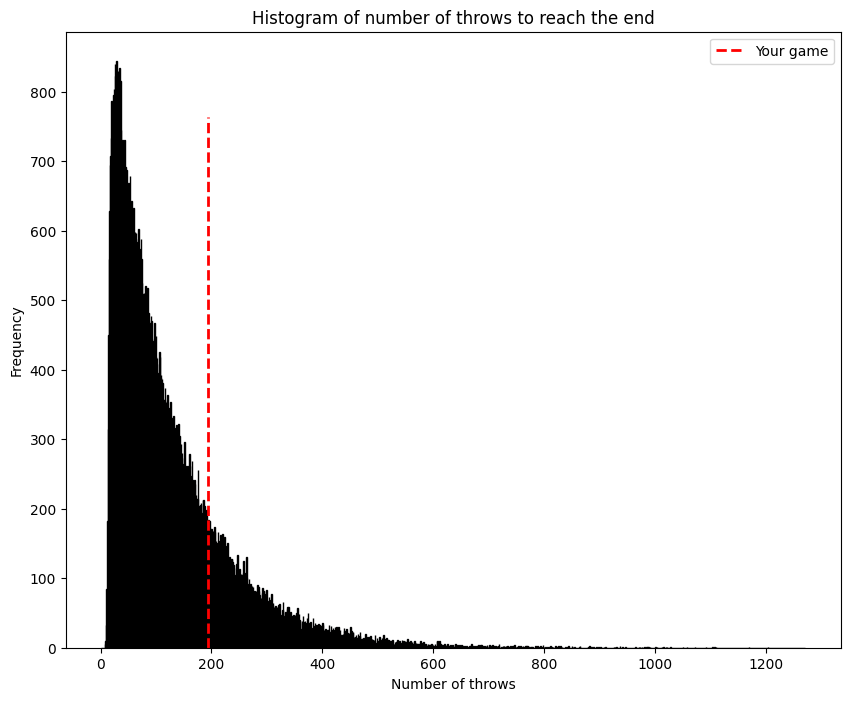

In [2]:

i = play_game(verbose=True, reverse=False)
k=0
for j in listy:
    if j < i:
        k+=1
    else:
        break

print(f'It took {i} throws to reach the end, this is worse than {k/1000}% of the games played')


fig, ax = plt.subplots(figsize=(10, 8))

ax.hist(listy, bins=range(1, max(listy)), color='tab:blue', edgecolor='black', align='left')
ax.vlines(x=i, ymin=0, ymax=max(listy)*0.6, color='red', linestyle='dashed', linewidth=2, label='Your game')
ax.set_xlabel('Number of throws')
ax.set_ylabel('Frequency')
ax.set_title('Histogram of number of throws to reach the end')
plt.legend()
plt.show()

